# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# Loading the dataset

In [2]:
salary = pd.read_csv("Salary_Data.csv")

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data Insights

In [4]:
salary.shape

(30, 2)

The dataset comprises of 30 observations and 2 features/variables. So, we have one variable which is independent and one is dependent.

We need to predict the Salary value based on the Years of Experience here. So, Salary is dependent variable (target) and Years of Expereience is independent variable in our case.

In [5]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

We can see the label of the columns (columns names)

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


We can see that both Years of Experience and Salary variables are having floating point data type values.
We can also see that all 30 observations are non null and hence we don't have any missing values.

In [7]:
salary[salary.duplicated()]

,YearsExperience,Salary


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

# Summary statistics 

In [8]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Observations :-

1. The mean value and the median value (50% or percentile) are not having much difference between them. 
2. Also there is not a big difference in the 75% value and max value for both the features
3. From observations, 1 and 2 we can say that there are no outliers in the dataset.

# Understanding target variable

Our target variable is Salary and we need to predict the Salary based on the number of years of experience 

In [9]:
salary['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Observations :-

The Salary variable here is a continuous variable and is numerical data

In [10]:
salary['Salary'].value_counts()

109431.0    1
37731.0     1
56957.0     1
57081.0     1
63218.0     1
91738.0     1
98273.0     1
46205.0     1
60150.0     1
105582.0    1
122391.0    1
64445.0     1
121872.0    1
112635.0    1
93940.0     1
39891.0     1
81363.0     1
57189.0     1
61111.0     1
56642.0     1
43525.0     1
101302.0    1
66029.0     1
55794.0     1
54445.0     1
39343.0     1
116969.0    1
67938.0     1
113812.0    1
83088.0     1
Name: Salary, dtype: int64

### Observations :- 

We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data 

# Data visualization 

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data 

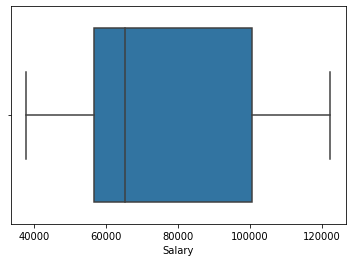

In [11]:
sn.boxplot(salary['Salary'])

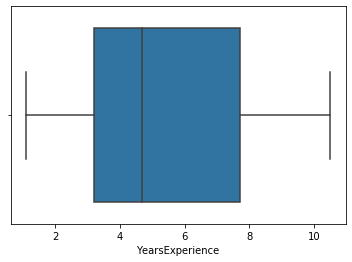

In [12]:
sn.boxplot(salary['YearsExperience'])

### Observations :-

1. There are no outliers in both Salary and Years Experience variables. So, we are good to proceed with our model prediction part. The outliers usually reduces the accuracy the model and might give incorrect predictions results.
2. By observing the box plot of Salary and Years Experience we can also see that the median line of the plot is slightly towards the upper portion of the box. We can say that the data points are positively skewed. 

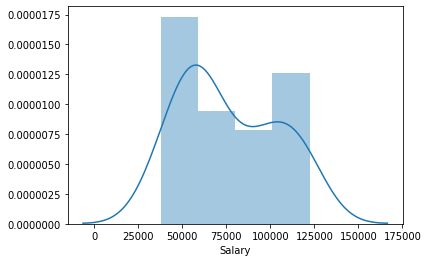

In [13]:
sn.distplot(salary['Salary'])

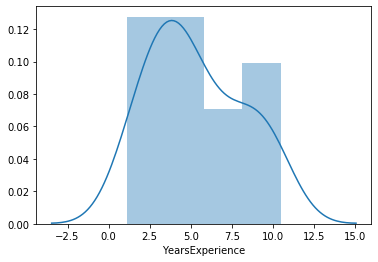

In [14]:
sn.distplot(salary['YearsExperience'])

### Observations :- 

The density plot helps the see the distribution of the data and gives insights regarding skewness.

1. Both the both plots are positively skewed.

### Pair plots

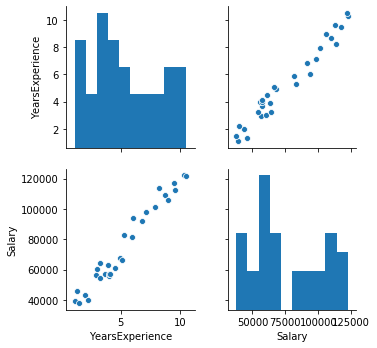

In [15]:
sn.pairplot(salary)

### Observations :- 

1. There is a positive correlation between Salary and Years of experience. As the years of experience increases the salary will increase. 

# Heatmap

Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

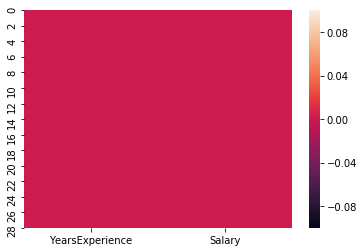

In [16]:
sn.heatmap(salary.isnull())

### Observations :- 

1. We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background. 

We can check missing values by using isna() method as well.

In [17]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Correlation 

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

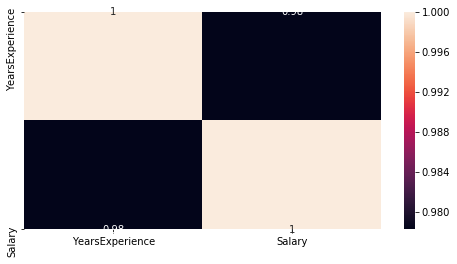

In [18]:
plt.figure(figsize=(8,4))
sn.heatmap(salary.corr(),annot=True)

# Finding Correlation value

In [19]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We can find the correlation values directly by corr() method. The value is 0.978 which is high, so we can say Salary and Experience are having high positive correlation.


# Fitting a linear regression model

We need to predict the Salary based on Experience. We have one dependent variable Salary and and one independent variable Experience. So we can use linear regression algorithm to predict and fit the line. 

In [20]:
model = smf.ols('Salary~YearsExperience',salary).fit()

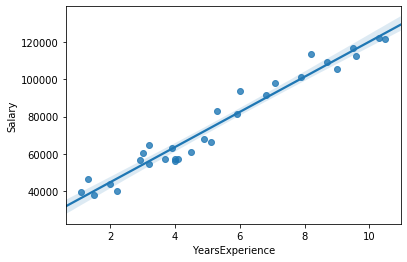

In [21]:
sn.regplot(x="YearsExperience", y="Salary",data=salary);

# Coffecients of model

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# t and p values

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


# R squared values

In [1]:
(model.rsquared,model.rsquared_adj)

NameError: name 'model' is not defined

# Predict Salary for new Experience values

In [25]:
newdata = pd.Series([12,14,16])

Creating a new series for Experience in years with values 12,14 and 16. We will using these data points and predict the Salary.

In [26]:
exp_newdata = pd.DataFrame(newdata,columns=['YearsExperience'])

In [27]:
exp_newdata

,YearsExperience
0,12
1,14
2,16


In [28]:
model.predict(exp_newdata)

0    139191.748056
1    158091.672699
2    176991.597342
dtype: float64

For Years of experience 12,14 and 16 we get the predicted values of Salary as 139191.748056,  158091.672699 and 176991.597342 respectively.